<a href="https://colab.research.google.com/github/sucheerarighthere/BasicProg_DataViz65/blob/main/%5Bdataprep3%5DDiscretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normallization เพื่อปรับขนาดไม่ให้ attribute ไหน มีขนาดมากกว่า (ปรับให้ค่ามีค่าใกล้ๆเคียงกัน)
เสิร์ช prepocessing data scikit learn

[ข้อความลิงก์](https://scikit-learn.org/stable/modules/preprocessing.html)

In [244]:
import pandas as pd

In [245]:

from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ใช้dataกรมอุตุ

In [246]:
weather_data = pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/bsc_DPDM_data_Group2_สุจีรา_จิราพัชร_กัลยรัตน์_ชุติมา (1).csv')

In [247]:
weather_data

,จังหวัด,สถานี,เดือน,ปี,วันที่,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1,1005.47,83.0,27.6,24.2,24.8,9,1.4,3
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,2,1006.65,92.0,25.6,24.0,23.0,10,17.7,2
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3,1007.49,86.0,25.6,22.9,22.1,10,3,3
3,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,4,1008.28,80.0,25.8,21.9,22.8,8,0,2
4,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,5,1009.88,86.0,24.3,21.7,23.1,10,2.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5340,เลย,352201-หนองคาย จ.หนองคาย,2,2022,23,1017.65,76.0,NaN,NaN,15.0,2,0,2
5341,เลย,352201-หนองคาย จ.หนองคาย,2,2022,25,1017.80,74.0,NaN,NaN,12.8,1,0,1
5342,เลย,352201-หนองคาย จ.หนองคาย,2,2022,26,1016.54,74.0,NaN,NaN,13.5,0,0,1
5343,เลย,352201-หนองคาย จ.หนองคาย,2,2022,27,1014.97,74.0,NaN,NaN,15.0,3,0,1


In [248]:
data_features = weather_data.iloc[:,5:]
data_features.head()

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,1005.47,83.0,27.6,24.2,24.8,9,1.4,3
1,1006.65,92.0,25.6,24.0,23.0,10,17.7,2
2,1007.49,86.0,25.6,22.9,22.1,10,3,3
3,1008.28,80.0,25.8,21.9,22.8,8,0,2
4,1009.88,86.0,24.3,21.7,23.1,10,2.2,2


In [249]:
data_features['ปริมาณฝน'].value_counts()

0       4276
T        147
0.2       50
0.1       40
0.4       38
        ... 
84.8       1
10.3       1
22.5       1
15.8       1
48.8       1
Name: ปริมาณฝน, Length: 264, dtype: int64

In [250]:
data_features.describe()

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ความเร็วลม
count,5345.000000,5345.000000,5208.000000,5208.000000,5345.000000,5345.000000,5345.000000
mean,1012.701308,323.203897,25.024520,18.463172,19.960748,3.365575,2.260430
std,3.166286,416.224916,2.712291,3.618938,3.294110,2.525753,1.210567
min,1002.040000,43.000000,11.800000,1.500000,6.800000,0.000000,0.000000
25%,1010.740000,68.000000,23.500000,16.200000,17.900000,1.000000,1.000000
50%,1012.600000,77.000000,25.400000,18.500000,20.400000,3.000000,2.000000
75%,1014.680000,1008.440000,27.000000,21.200000,22.500000,5.000000,3.000000
max,1026.100000,1025.710000,31.000000,28.400000,26.700000,10.000000,10.000000


In [251]:
data_features.dtypes #object เเพราะมีตัวหนังสือปนกับตัวเลขเพราะไม่รู้จะให้ค่าไหนเลยให้เป็ฯออบเจค เอาไปใช้ในทางคณิตศาสตร์ไม่เจอ
#ถ้าเปลี่ยนสตริงเป็นตัวเลขไม่ได้ เป็ฯไปได้ว่าสตริงตัวนั้นอาจจะเป็น dash , one , two

ความกด                float64
ความชื้น              float64
อุณหภูมิตุ้มแห้ง      float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิต่ำสุด        float64
จำนวนเมฆ                int64
ปริมาณฝน               object
ความเร็วลม              int64
dtype: object

In [252]:
#data_features['ปริมาณฝน']=data_features['ปริมาณฝน'].astyps(int)
#อันนี้เออเร่อ เพราะมีt 

In [253]:
data_features[data_features.eq('-').any(1)] #โค้ดนี้เอาตารางที่หาค่าที่เจอใน''เอามาโชว์ ถ้าไม่ขึ้นอะไรเลยแปลว่าไม่เจอ 
#any1 เพื่อดูทุกคอลัมน์
#โค้ดนี้เป็นโค้ดที่เราตามหาค่าที่เราต้องการ แถวไหน มีค่าที่เราต้องการ

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม


In [254]:
weather_data[weather_data['ความเร็วลม'].eq('3')] #'3' ของความเร็วลมอันนี้เป็นอินท์ ต้องเอา'3' ออก

,จังหวัด,สถานี,เดือน,ปี,วันที่,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม


In [255]:
weather_data[weather_data['ความเร็วลม'].eq(3)] #อันนี้เป็นตาราง weather

,จังหวัด,สถานี,เดือน,ปี,วันที่,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1,1005.47,83.0,27.6,24.2,24.8,9,1.4,3
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3,1007.49,86.0,25.6,22.9,22.1,10,3,3
5,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,6,1011.36,86.0,24.0,21.3,21.7,10,0.5,3
7,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,8,1010.20,82.0,27.0,23.3,23.2,7,0.2,3
9,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,10,1010.60,77.0,27.5,22.7,23.2,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5159,เลย,352201-หนองคาย จ.หนองคาย,12,2020,30,1013.80,74.0,23.8,16.5,18.0,4,0,3
5190,เลย,352201-หนองคาย จ.หนองคาย,2,2021,9,1013.18,92.0,19.3,17.2,16.0,9,10.2,3
5229,เลย,352201-หนองคาย จ.หนองคาย,10,2021,22,1013.68,91.0,NaN,NaN,21.9,9,0,3
5304,เลย,352201-หนองคาย จ.หนองคาย,1,2022,18,1014.98,71.0,NaN,NaN,19.0,3,0,3


In [256]:
data_features[data_features['ความเร็วลม'].eq(3)==False] #ถ้าทำแบบนี้แปลว่าดรอปค่าที่เท่ากับในวงเล็บออก

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
1,1006.65,92.0,25.6,24.0,23.0,10,17.7,2
3,1008.28,80.0,25.8,21.9,22.8,8,0,2
4,1009.88,86.0,24.3,21.7,23.1,10,2.2,2
6,1011.17,83.0,25.1,21.9,22.0,10,1.3,4
8,1010.14,82.0,27.1,23.4,24.1,8,4.6,4
...,...,...,...,...,...,...,...,...
5340,1017.65,76.0,NaN,NaN,15.0,2,0,2
5341,1017.80,74.0,NaN,NaN,12.8,1,0,1
5342,1016.54,74.0,NaN,NaN,13.5,0,0,1
5343,1014.97,74.0,NaN,NaN,15.0,3,0,1


อาจารย์ถามในห้อง 

In [257]:
weather_data[weather_data['ปริมาณฝน'].eq('T')] #เรียกมาดู
weather_data=weather_data[weather_data['ปริมาณฝน'].eq('T')==False] #แล้วดรอปซะ
weather_data.dropna()

,จังหวัด,สถานี,เดือน,ปี,วันที่,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,1,1005.47,83.0,27.6,24.2,24.8,9,1.4,3
1,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,2,1006.65,92.0,25.6,24.0,23.0,10,17.7,2
2,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,3,1007.49,86.0,25.6,22.9,22.1,10,3,3
3,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,4,1008.28,80.0,25.8,21.9,22.8,8,0,2
4,ขอนแก่น,352201-หนองคาย จ.หนองคาย,10,2011,5,1009.88,86.0,24.3,21.7,23.1,10,2.2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5203,เลย,352201-หนองคาย จ.หนองคาย,2,2021,24,1008.39,69.0,26.8,18.4,18.0,0,0,1
5204,เลย,352201-หนองคาย จ.หนองคาย,2,2021,25,1006.05,61.0,27.8,17.3,19.5,0,0,1
5205,เลย,352201-หนองคาย จ.หนองคาย,2,2021,26,1004.86,55.0,26.3,13.0,16.0,0,0,2
5206,เลย,352201-หนองคาย จ.หนองคาย,2,2021,27,1005.76,56.0,25.2,13.8,15.3,2,0,1


In [258]:
# make to data_features
data_features[data_features['ปริมาณฝน'].eq('T')] #เรียกมาดู
data_features_d=data_features[data_features['ปริมาณฝน'].eq('T')==False] #แล้วดรอปซะ
data_features=data_features_d.dropna() ##มีโปรเซส แล้วมีต้องแก้ไขจะเปลี่ยนชื่่อตารางด้วย 
data_features.head(10)

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
0,1005.47,83.0,27.6,24.2,24.8,9,1.4,3
1,1006.65,92.0,25.6,24.0,23.0,10,17.7,2
2,1007.49,86.0,25.6,22.9,22.1,10,3,3
3,1008.28,80.0,25.8,21.9,22.8,8,0,2
4,1009.88,86.0,24.3,21.7,23.1,10,2.2,2
5,1011.36,86.0,24.0,21.3,21.7,10,0.5,3
6,1011.17,83.0,25.1,21.9,22.0,10,1.3,4
7,1010.20,82.0,27.0,23.3,23.2,7,0.2,3
8,1010.14,82.0,27.1,23.4,24.1,8,4.6,4
9,1010.60,77.0,27.5,22.7,23.2,4,0,3


In [259]:
#เปลี่ยนให้เป็นfloat

In [260]:
data_features_d.dtypes

ความกด                float64
ความชื้น              float64
อุณหภูมิตุ้มแห้ง      float64
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิต่ำสุด        float64
จำนวนเมฆ                int64
ปริมาณฝน               object
ความเร็วลม              int64
dtype: object

In [261]:
data_features_d['ปริมาณฝน']=data_features_d['ปริมาณฝน'].astype(float)

<ipython-input-261-159c4daff547>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features_d['ปริมาณฝน']=data_features_d['ปริมาณฝน'].astype(float)


In [262]:
data_features_d.describe()

,ความกด,ความชื้น,อุณหภูมิตุ้มแห้ง,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,จำนวนเมฆ,ปริมาณฝน,ความเร็วลม
count,5198.000000,5198.000000,5061.000000,5061.000000,5198.000000,5198.000000,5198.000000,5198.000000
mean,1012.722753,318.164052,25.002667,18.420944,19.904482,3.312620,1.577972,2.260100
std,3.167502,413.573766,2.720534,3.630472,3.302005,2.503989,7.041274,1.206769
min,1002.040000,43.000000,11.800000,1.500000,6.800000,0.000000,0.000000,0.000000
25%,1010.760000,68.000000,23.500000,16.100000,17.800000,1.000000,0.000000,1.000000
50%,1012.620000,77.000000,25.400000,18.500000,20.300000,3.000000,0.000000,2.000000
75%,1014.710000,1008.005000,26.900000,21.200000,22.500000,5.000000,0.000000,3.000000
max,1026.100000,1025.710000,31.000000,28.400000,26.700000,10.000000,138.200000,10.000000


In [263]:
#data_features_d.hist() ไม่ใช่อันนี้

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s

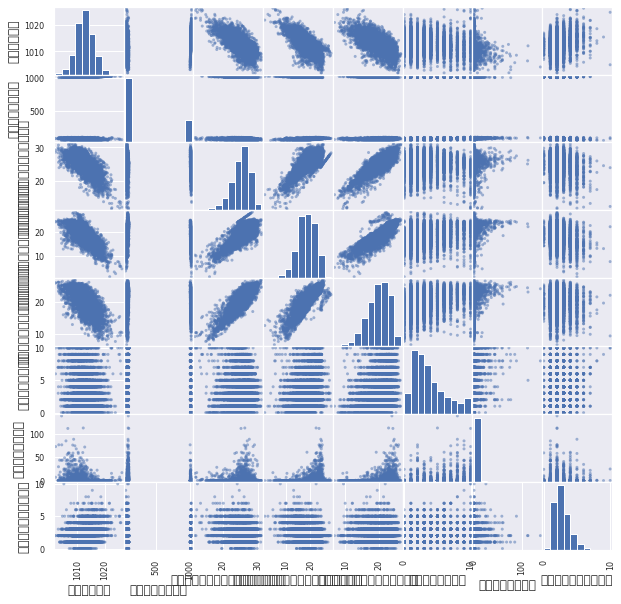

In [264]:
#จะเห็ฯการกระจายถ้าดูจากฮิสโตแกรม
import matplotlib
pd.plotting.scatter_matrix(data_features_d);

In [265]:
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize']=[10,10]

(array([  35.,  140.,  484., 1291., 1617., 1019.,  466.,  118.,   19.,
           9.]),
 array([1002.04 , 1004.446, 1006.852, 1009.258, 1011.664, 1014.07 ,
        1016.476, 1018.882, 1021.288, 1023.694, 1026.1  ]),
 <a list of 10 Patch objects>)

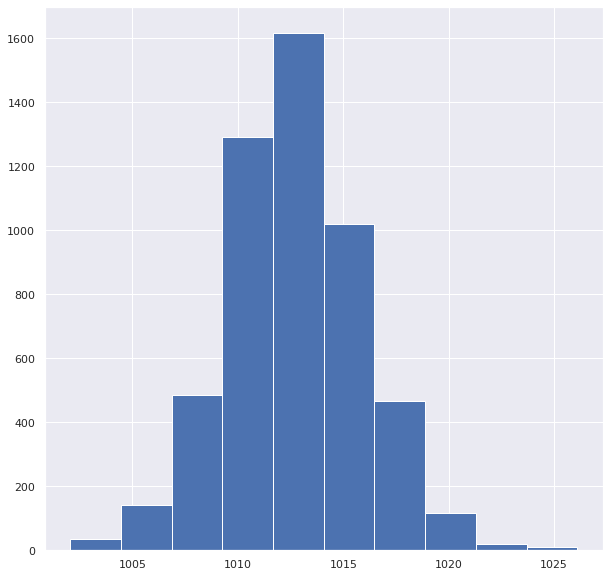

In [266]:
plt.hist(data_features_d['ความกด']) #หน้าตาก่อนที่จะทำ normallization


## Preprocessing(3ขั้นตอน define/train/transform)

Standardization หรือ Z-Score Normalization คือ การนำข้อมูล Feature / Column มาปรับให้ Mean = 0 และ Standard Deviation = 1 (Unit Variance)

การทำ Normalization

การทำ normalization หมายถึงการทำให้ข้อมูลเป็นค่ามาตรฐาน เป็นเทคนิค feature scaling ที่จะนำข้อมูลแต่ละ feature อยู่ในย่านจำนวนจริงที่ machine learning อ่านได้ง่ายขึ้น ในแต่ละวิธีที่จะพูดถึง ได้แก่ MinMaxScaler, MaxAbsScaler, และ RobustScaler

In [267]:
 from sklearn import preprocessing

In [268]:
# 3 steps of scikit
#define ข้างในวงเล็บเป็นพารคามิเตอร์ที่เราสามารถใส่ได้ เช่นให้มีนกับแสตนดาร์ดเป็นค่าอื่นๆ ถ้าไม่มีค่าในวงเล็บคือค่า default
scaler = preprocessing.StandardScaler()
#train สร้าง โมเดลจากเดต้าให้ฟิตกับข้อมูลกับเรา โดยใช้ชื่อที่ดีฟายด้านบนมาฟิดกับเดต้าที่เราต้องการ
scaler.fit(data_features_d)
#transform ไม่ได้ทำนายเดต้าใหม่ / predict  ทำนายเดต้าใหม่ แล้วแต่ algorithm
data_features_d_s=scaler.transform(data_features_d)
#ในการที่เราจะใช้ไลบารีของ scikit เริ่มจากการตั้งค่าพารามิเตอร์ให้มันก่อน
#คือจะทำ mean=0 standard = 1
# 'data_features_d_s=scaler.fit_transform(data_features_d)' ฟิตทรานฟอม คือรวบขั้นตอนเทรนกับทรานฟอรม (รวมดาต้าเดียวกัน)

In [269]:
data_features_d_s 

array([[-2.28995943, -0.56866923,  0.95480871, ...,  2.2715461 ,
        -0.02527801,  0.61318382],
       [-1.91739027, -0.5469056 ,  0.21958617, ...,  2.67094727,
         2.28986668, -0.215555  ],
       [-1.65217154, -0.56141469,  0.21958617, ...,  2.67094727,
         0.20197545,  0.61318382],
       ...,
       [ 1.20524452, -0.59043286,         nan, ..., -1.32306438,
        -0.2241248 , -1.04429382],
       [ 0.70953809, -0.59043286,         nan, ..., -0.12486089,
        -0.2241248 , -1.04429382],
       [ 0.04964864, -0.59526922,         nan, ..., -0.52426205,
        -0.2241248 , -1.04429382]])

(array([  35.,  140.,  484., 1291., 1617., 1019.,  466.,  118.,   19.,
           9.]),
 array([-3.37293591, -2.61327369, -1.85361148, -1.09394926, -0.33428705,
         0.42537517,  1.18503738,  1.9446996 ,  2.70436181,  3.46402403,
         4.22368624]),
 <a list of 10 Patch objects>)

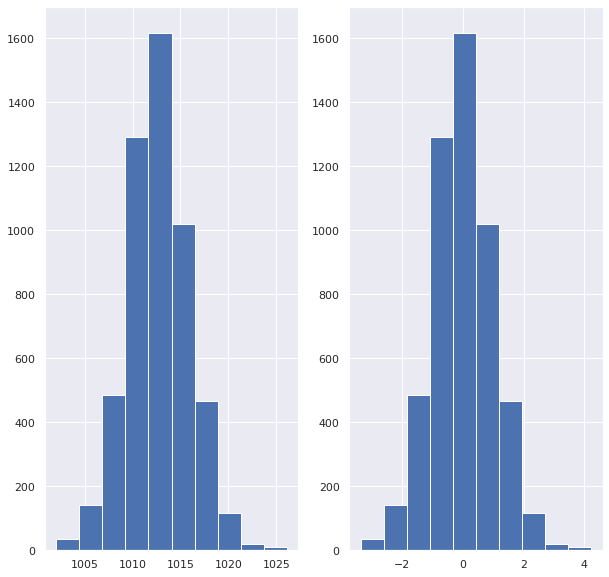

In [270]:
#เปรียบเทียบสองกราฟ ก่อนหลังทำ normalization standard
plt.subplot(1,2,1)
plt.hist(data_features_d['ความกด']) #หน้าตาก่อนที่จะทำ normallization
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,0])
#ปรับให้ค่ามากๆๆๆๆ มาอยู่ที่ใกล้ๆกับค่า -1,1

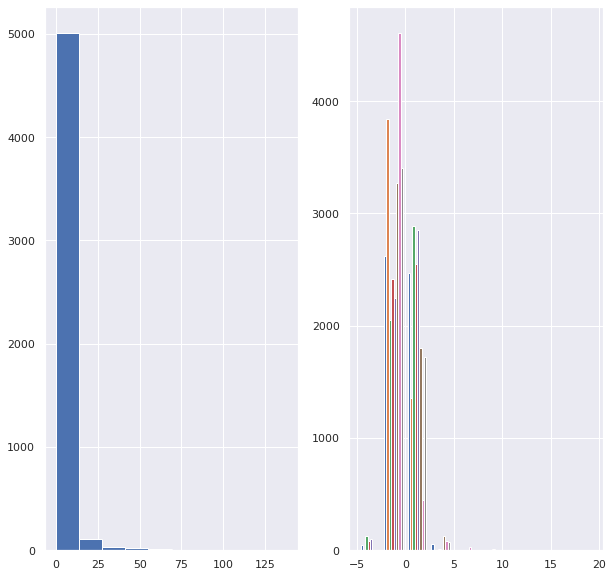

In [271]:
#ปริมาณฝน
plt.subplot(1,2,1)
plt.hist(data_features_d['ปริมาณฝน']) #หน้าตาก่อนที่จะทำ normallization
plt.subplot(1,2,2)
plt.hist(data_features_d_s[:,]);

### Min Max normallization

In [272]:
# 3 steps of scikit
#define ข้างในวงเล็บเป็นพารคามิเตอร์ที่เราสามารถใส่ได้ min,max ถ้าไม่มีค่าในวงเล็บคือค่า default
scaler = preprocessing.MinMaxScaler()
#train สร้าง โมเดลจากเดต้าให้ฟิตกับข้อมูลกับเรา โดยใช้ชื่อที่ดีฟายด้านบนมาฟิดกับเดต้าที่เราต้องการ
scaler.fit(data_features_d)
#transform ไม่ได้ทำนายเดต้าใหม่ / predict  ทำนายเดต้าใหม่ แล้วแต่ algorithm
data_features_d_norm=scaler.transform(data_features_d)
#

(array([  35.,  140.,  484., 1291., 1617., 1019.,  466.,  118.,   19.,
           9.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

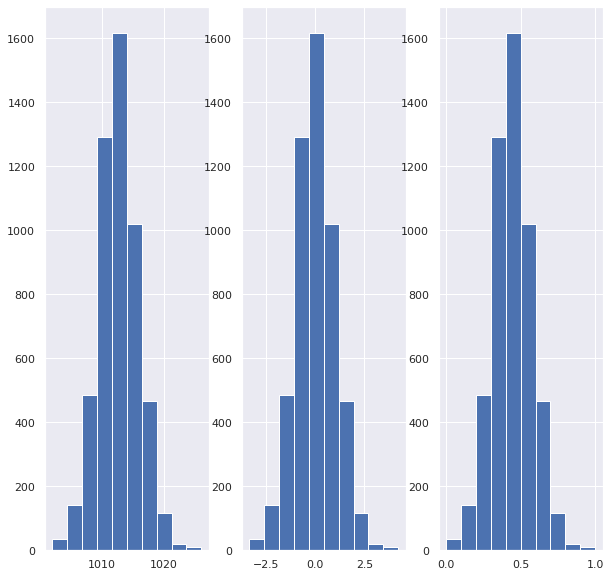

In [273]:
#เปรียบเทียบสองกราฟ ก่อนหลังทำ normalization
plt.subplot(1,3,1)
plt.hist(data_features_d['ความกด']) #หน้าตาก่อนที่จะทำ normallization
plt.subplot(1,3,2)
plt.hist(data_features_d_s[:,0])
#ปรับให้ค่ามากๆๆๆๆ มาอยู่ที่ใกล้ๆกับค่า -1,1
plt.subplot(1,3,3)
plt.hist(data_features_d_norm[:,0]) #ค่านี้มันจะเข้าใกล้ 1,0,-1 มากๆๆๆ

## Discretization

In [274]:
home_data= pd.read_csv('/content/drive/MyDrive/bsc_DPDM_data/อุตุ/bsc_DPDM_data_สุจีรา นาคคำ (1).csv')

In [275]:
home_data.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4


In [276]:
#เน้นการ data mining / 50% after midterm is classification เป็นการทำนายกลุ่มให้มัน >> sale price 
#จัดกลุ่ม saleprice โดยการใช้ classification
#ค่าที่เป้น missing จะแทนมั่วๆไม่ได้


In [277]:
# drop only missing in sale price

In [278]:
home_data.columns

Index(['post_id', 'number_of_rai', 'number_of_ngan', 'number_of_va',
       'number_of_story', 'number_of_bedroom', 'number_of_bathroom',
       'direction', 'furniture', 'usable_area', 'number_of_parking',
       'project_name', 'district', 'zone', 'street', 'sell_price', 'd250-7/11',
       'd500-7/11', 'd750-7/11', 'd1000-7/11', 'd1250-7/11', 'd1500-7/11'],
      dtype='object')

### ลบ เรคอร์ดที่ ค่า sellprice เป็ณค่าว่าง

In [279]:
home_data = home_data.dropna(subset=['sell_price'])
home_data #ไม่มีอยู่แล้ว 

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,1,3,3,4


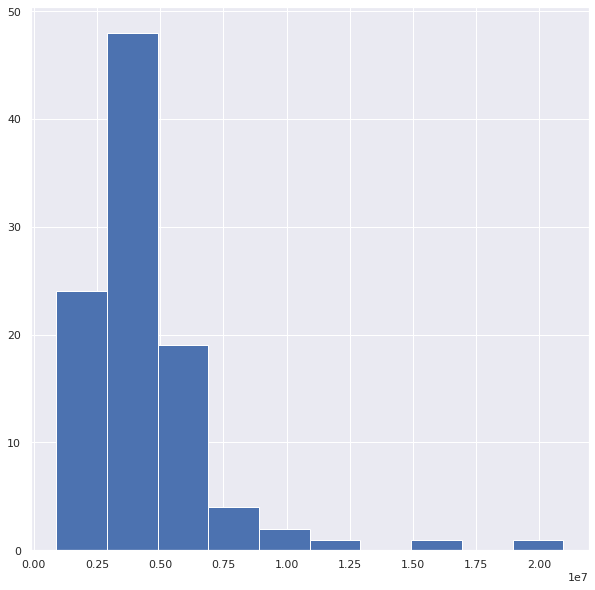

In [280]:
plt.hist(home_data['sell_price']); #กราฟยอดฮิต ดูการกระจายของ data
#เราจะสามารถแบ่งราคาได้ชัดเจนเห็นชัดมาก


### แบ่งบ้านเป็นสามเกรด 


1.    1m+  ให้เป็น  3,c
2.   500k - 1m ให้เป็น 2,b
3. 0- 500K ให้เป็น1,a


In [281]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
sns.set()


In [294]:
hds= home_data[['sell_price']]


In [291]:
type('hds')

str

In [295]:
hds['Grade']='3'
hds['Grade'][(hds['sell_price'] > 10000000)]='3'
hds['Grade'][(hds['sell_price'] <= 10000000) | (hds['sell_price']>=5000000)]='2'
hds['Grade'][(hds['sell_price'] < 5000000)]='1'

<ipython-input-295-f5811e6b44ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hds['Grade']='3'
<ipython-input-295-f5811e6b44ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hds['Grade'][(hds['sell_price'] > 10000000)]='3'
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<i

In [285]:
hds

,sell_price,Grade
0,2700000.0,1
1,2600000.0,1
2,5900000.0,2
3,4400000.0,1
4,2750000.0,1
...,...,...
95,5500000.0,2
96,7911000.0,2
97,2990000.0,1
98,4000000.0,1


In [287]:
#hds['Grade']=(
#if (hds['sell_price'] >= 1000000) 
 #   return "1";
#elif ((hds['sell_price']>500000 | hds['sell_price']<1000000 
 #   return "2";
#else:
  #  return "3";)

In [298]:
home_data.dtypes

post_id               float64
number_of_rai         float64
number_of_ngan        float64
number_of_va          float64
number_of_story       float64
number_of_bedroom     float64
number_of_bathroom    float64
direction             float64
furniture             float64
usable_area           float64
number_of_parking     float64
project_name           object
district               object
zone                   object
street                 object
sell_price            float64
d250-7/11               int64
d500-7/11               int64
d750-7/11               int64
d1000-7/11              int64
d1250-7/11              int64
d1500-7/11              int64
dtype: object

In [288]:
def filter(x):
  if x < 5000000:
    return '1'
  if x > 10000000:
    return '3'
    

#One hot encoder

เปลี่ยนตารางให้เพิ่มด้วยนะ

In [302]:
#หนึุ่งในแพนด้า
home_data #แปลงให้เป็นดัมมี่
home_data_dummies=pd.get_dummies(home_data['zone']) #ถ้าเคยอยุ่โซนไหนก็จะเป็น1 ไม่เคยจะเป็น 0

In [303]:
home_data_dummies

,กลางเมือง-เมืองเก่า-กุดกว้าง,ดอนบม-บายพาส-บ้านผือ-พระลับ,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,บ้านเป็ด-โคกฟันโปง,ม.ภาค-บ้านกอก-บึงหนองโคตร,มะลิวัลย์-ร.8-สนามบิน,ศิลา-โกทา-หนองไผ่-บ้านดอน,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,เหล่านาดี-บ้านสะอาด-บ้านโจด,โนนทัน-บึงแก่นนคร,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ในเมือง-รื่นรมย์-เทพารักษ์
0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,1,0,0,0,0
96,0,0,0,0,0,0,0,0,0,1,0,0
97,0,0,0,0,0,0,0,1,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,1,0


In [306]:
home_data #แปลงให้เป็นดัมมี่
home_data_dummies=pd.get_dummies(home_data,columns=['zone']) #ใช้้แค้กับคอลลัมน์นี้เท่านั้น
home_data_dummies

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone_ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,zone_บ้านเป็ด-โคกฟันโปง,zone_ม.ภาค-บ้านกอก-บึงหนองโคตร,zone_มะลิวัลย์-ร.8-สนามบิน,zone_ศิลา-โกทา-หนองไผ่-บ้านดอน,zone_สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,zone_เหล่านาดี-บ้านสะอาด-บ้านโจด,zone_โนนทัน-บึงแก่นนคร,zone_โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,zone_ในเมือง-รื่นรมย์-เทพารักษ์
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,0,0,0,0,0,0,0,1,0,0
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,0,0,0,0,0,0,0,0,0,0
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,0,0,0,0,0,1,0,0,0,0
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,0,0,0,0,0,0,0,0,1,0
